# PCA as a Factor Model - Coding Exercises


### Introduction

As we learned in the previous lessons, we can use PCA to create a factor model of risk. Our risk factor model represents the return as:

$$
\textbf{r} = \textbf{B}\textbf{f} + \textbf{s}
$$

where $\textbf{r}$ is a matrix containing the asset returns, $\textbf{B}$ is a matrix representing the factor exposures, $\textbf{f}$ is the matrix of factor returns, and $\textbf{s}$ is the idiosyncratic risk (also known as the company specific risk).

In this notebook, we will use real stock data to calculate:

* The Factor Exposures (Factor Betas) $\textbf{B}$
* The Factor Returns $\textbf{f}$
* The Idiosyncratic Risk Matrix $\textbf{S}$
* The Factor Covariance Matrix $\textbf{F}$

We will then combine these quantities to create our Risk Model. 

### Install Packages

In [6]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 2.5MB 9.9MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 20.4MB/s ta 0:00:01
    100% |████████████████████████████████| 26.3MB 1.4MB/s eta 0:00:01 0% |                                | 71kB 23.7MB/s eta 0:00:02    21% |██████▉                         | 5.6MB 30.0MB/s eta 0:00:01    27% |████████▋                       | 7.1MB 32.1MB/s eta 0:00:01    71% |███████████████████████         | 18.8MB 30.4MB/s eta 0:00:01    87% |████████████████████████████    | 22.9MB 28.8MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 20.3MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 21.9MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 17.5MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 624kB 17.9MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 15.7MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |███████

# Get Returns

In this notebook, we will get the stock returns using Zipline and data from Quotemedia, just as we learned in previous lessons. The function `get_returns(start_date, end_date)` in the `utils` module, gets the data from the Quotemedia data bundle and produces the stock returns for the given `start_date` and `end_date`. You are welcome to take a look at the `utils` module to see how this is done.

In the code below, we use `utils.get_returns` funtion to get the returns for stock data between `2011-01-05` and `2016-01-05`. You can change the start and end dates, but if you do, you have to make sure the dates are valid trading dates. 

In [59]:
import utils

# Get the returns for the fiven start and end date. Both dates must be valid trading dates
returns = utils.get_returns(start_date='2011-01-05', end_date='2016-01-05')

# Display the first rows of the returns
returns.head().T.head().T

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV])
2011-01-07 00:00:00+00:00,0.008437,0.014230,0.026702,0.007146,0.0
2011-01-10 00:00:00+00:00,-0.004174,0.006195,0.007435,0.018852,0.0
2011-01-11 00:00:00+00:00,-0.001886,-0.043644,-0.005927,-0.002367,0.0
2011-01-12 00:00:00+00:00,0.017254,-0.008237,0.013387,0.008133,0.0
2011-01-13 00:00:00+00:00,-0.004559,0.000955,0.003031,0.003657,0.0


# Factor Exposures

In the code below, write a function, `factor_betas(pca, factor_beta_indices, factor_beta_columns)` that calculates the factor exposures from Scikit-Learn's `PCA()` class. Remember the matrix of factor exposures, $\textbf{B}$, describes the coordintates of the Principal Components in the original basis. The `pca` parameter must be a Scikit-Learn's pca object, that has fit the model with the returns. In other words, you must first run `pca.fit(returns)` before passing this parameter into the function. Later in this notebook we will create a function, `fit_pca()`, that will fit the pca model and return the `pca`object. The `factor_beta_indices` parameter must be a 1 dimensional ndarray containg the column names of the `returns` dataframe. The `factor_beta_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pca` model minus one. For example, if you used 5 principal compoenents in your `pca` model, `pca = PCA(n_components = 5)`, then `factor_beta_columns = [0, 1, 2, 3, 4]`. This function has to return a Pandas dataframe with the factor exposures, where the `factor_beta_indices` correspond to the indices of the dataframe and the `factor_beta_columns` correspond to the column names of the dataframe. 

In [9]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    """Return the components of a PCA model

    Parameters:
    pca (PCA): PCA Object from scikit applied to returns

    Returns:
    DataFrame: Principal Component Vectors
    """
    
    # return the principal component vectors in a dataframe
    df_component_vectors = pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)
    return df_component_vectors

# Factor Retuns

In the code below, write a function, `factor_returns(pca, returns, factor_return_indices, factor_return_columns)` that calculates the factor returns from Scikit-Learn's `PCA()` class. Remember the matrix of factor returns, $\textbf{f}$, represents the `returns` written in the **new** basis. The `pca` parameter must be a Scikit-Learn's pca object, that has fit the model with the returns. In other words, you must first run `pca.fit(returns)` before passing this parameter into the function. Later in this notebook we will create a function, `fit_pca()`, that will fit the pca model and return the `pca`object. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `factor_return_indices` parameter must be a 1 dimensional ndarray containing the trading dates (Pandas `DatetimeIndex`) in the `returns` dataframe. The `factor_return_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pca` model minus one. For example, if you used 5 principal compoenents in your `pca` model, `pca = PCA(n_components = 5)`, then `factor_beta_columns = [0, 1, 2, 3, 4]`. This function has to return a Pandas dataframe with the factor returns, where the `factor_return_indices` correspond to the indices of the dataframe and the `factor_return_columns` correspond to the column names of the dataframe.

In [10]:
import pandas as pd 

def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    """Return the returns on the PCA bases

    Parameters:
    pca (PCA): PCA Object from scikit applied to returns

    Returns:
    DataFrame: Returns transformed to be in terms of principal components
    """
    
    # project the principal component vectors on to our returns data
    df_returns_transformed = pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)
    return df_returns_transformed

# Idiosyncratic Risk Matrix

Let's review how we can calculate the Idiosyncratic Risk Matrix $\textbf{S}$. We know that: 

$$
\textbf{s} = \textbf{r} - \textbf{B}\textbf{f}
$$

We refer to $\textbf{s}$ as the residuals. To calculate the idiosyncratic or specific risk matrix $\textbf{S}$, we have to calculate the covariance matrix of the residuals, $\textbf{s}$, and set the off-diagonal elements to zero. 

With this in mind, in the code below cerate a function, `idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor)` that calclates the **annualized** Idiosyncratic Risk Matrix. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `factor_returns` parameter is the output of the `factor_returns()` function created above. Similarly, the `factor_betas` parameter is the output of the `factor_betas()` function created above. The `ann_factor` parameter is an integer representing the annualization factor. 

Remember that if the `returns` time series are daily returns, then when we calculate the Idiosyncratic Risk Matrix we will get values on a daily basis. We can annualize these values simply by multiplying the whole Idiosyncratic Risk Matrix by an annualization factor of 252. Remember we don't need the square root of the factor because our numbers here are variances not standard deviations.

The function must return a pandas dataframe with the annualized Idiosyncratic Risk Matrix containing the covariance of the residuals in its main diagonal and with all the off-diagonal elements set to zero. 

In [60]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    """Idiosyncratic risk refers to the risk not explained by our components""" 
    
    # calc the returns explained by our model
    beta_returns = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
    # calc the diff between our model returns and the true returns
    residuals = (returns - beta_returns)
    
    ann_residuals = residuals * ann_factor
    
    # the variance of these residuals shows us our risk using the model
    # i.e. large variance shows us that our components aren't explaining the actual returns
    # small variance shows us that our components are explaining most of the actual returns 
    var_ann_residuals = np.var(residuals)
    
    return pd.DataFrame(np.diag(var_ann_residuals), returns.columns, returns.columns)

# Factor Covariance Matrix

To calculate the annualized factor covariance matrix, $\textbf{F}$, we use the following equation:

$$
\textbf{F} = \frac{1}{N -1}\textbf{f}\textbf{f}^T
$$

where, $N$ is the number of elements in $\textbf{f}$. Recall that the factor covariance matrix, $\textbf{F}$, is a diagonal matrix.

With this in mind, create a function, `factor_cov_matrix(factor_returns, ann_factor)` that calculates the annualized factor covariance matrix from the factor returns $\textbf{f}$. The `factor_returns` parameter is the output of the `factor_returns()` function created above and the `ann_factor` parameter is an integer representing the annualization factor. The function must return a diagonal numpy ndarray 

**HINT :** You can calculate the factor covariance matrix $\textbf{F}$ very easily using Numpy's `.var` method. The $\frac{1}{N -1}$ factor can be taken into account using the `ddof` keyword. 

In [83]:
def factor_cov_matrix(factor_returns, ann_factor):
 
    # we use a covariance matrix but return a diagonal matrix
    # which shows us the covariance of the factor with itself
    # which is just the variance of that factor
    return np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)

# Perfom PCA

In the code below, create a function, `fit_pca(returns, num_factor_exposures, svd_solver)` that uses Scikit-Learn's `PCA()` class to fit the `returns` dataframe with the given number of `num_factor_exposures` (Principal Components) and with the given `svd_solver`. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you want to use in your PCA algorithm. The `svd_solver` parameter is a string that determines the type of solver you want to use in your PCA algorithm. To see the type of solvers that you can use, see the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). The function must fit the `returns` and return the `pca` object. 

In [84]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):

    # fit the PCA for our selected number of components
    pca = PCA(n_components = num_factor_exposures, svd_solver = svd_solver)
    pca.fit(returns)
    return pca

# Create The Risk Model


In the code below, create a class:

```python
class RiskModel(object):
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):
```

where the `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `ann_factor` parameter is an integer representing the annualization factor. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you want to use in your PCA algorithm. The `pca` parameter is the output of the `fit_pca()` function created above. The class must contain all the fucntions created above. For example, to include the Factor covariance matrix we will use:

```python
self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
```

In [90]:
import numpy as np

class RiskModel(object):
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):

        # attributes 
        
        # best fitting vectors from returns in our current basis
        self.factor_betas = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))
        
        # the vectors fitted to the basis from PCA to allow dimensionality reduction
        self.factor_returns = factor_returns(pca, returns, returns.index, 
                                             np.arange(num_factor_exposures))
        
        # the variance of each factor
        self.factor_cov_matrix = factor_cov_matrix(self.factor_returns, ann_factor)
        
        # the variance of the returns not explained by our components
        self.idiosyncratic_var_matrix = idiosyncratic_var_matrix(returns, self.factor_returns, 
                                                                 self.factor_betas, ann_factor)

# Set the annualized factor
ann_factor = 252

# Set the number of factor exposures (principal components) for the PCA algorithm
num_factor_exposures = 40

# Set the svd solver for the PCA algorithm
svd_solver = 'full'

# Fit the PCA Model using the fit_pca() fucntion 
pca = fit_pca(returns, num_factor_exposures, svd_solver)

# Create a RiskModel object
rm = RiskModel(returns, ann_factor, num_factor_exposures, pca)

# Print The Factor Exposures

In [91]:
# Display the Factor Exposures 5x5 trimmed
print(
"""
Column headers show each component found from PCA
Index shows each Equity
Data shows the the co-ordinates of each equity to each component 
""")

display(rm.factor_betas.head().T.head().T)


Column headers show each component found from PCA
Index shows each Equity
Data shows the the co-ordinates of each equity to each component 



,0,1,2,3,4
Equity(0 [A]),-0.043168,0.019551,-0.009934,0.010540,-0.018198
Equity(1 [AAL]),-0.058745,0.196377,0.078688,0.082096,0.348478
Equity(2 [AAP]),-0.034333,0.034515,0.011338,-0.025437,-0.008172
Equity(3 [AAPL]),-0.034100,-0.001393,0.039467,-0.017213,-0.030470
Equity(4 [ABBV]),-0.018031,0.025682,0.004352,-0.070782,0.013199


# Print The Factor Returns

In [92]:
# Display the Factor Returns
print(
"""
Column headers show each component found from PCA
Index shows datas
Data shows the returns on that day for each component
""")
rm.factor_returns.head().T.head().T


Column headers show each component found from PCA
Index shows datas
Data shows the returns on that day for each component



,0,1,2,3,4
2011-01-07 00:00:00+00:00,-0.000574,-0.030781,0.011428,-0.023880,0.074403
2011-01-10 00:00:00+00:00,-0.003338,-0.029503,0.063908,-0.003170,-0.040026
2011-01-11 00:00:00+00:00,-0.069368,-0.089216,-0.022045,-0.009421,0.005051
2011-01-12 00:00:00+00:00,-0.173642,-0.041056,-0.007258,0.040697,-0.004041
2011-01-13 00:00:00+00:00,0.034800,0.003940,0.023370,-0.034629,0.018526


# Print The Idiosyncratic Risk Matrix

In [93]:
# Display the Idiosyncratic Risk Matrix
print(
"""
Data shows the variance of the residuals for each stock
Larger numbers mean less risk has been captured by our components
""")
rm.idiosyncratic_var_matrix.head().T.head().T



Data shows the variance of the residuals for each stock
Larger numbers mean less risk has been captured by our components



,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV])
Equity(0 [A]),0.000078,0.000000,0.000000,0.000000,0.000000
Equity(1 [AAL]),0.000000,0.000168,0.000000,0.000000,0.000000
Equity(2 [AAP]),0.000000,0.000000,0.000196,0.000000,0.000000
Equity(3 [AAPL]),0.000000,0.000000,0.000000,0.000168,0.000000
Equity(4 [ABBV]),0.000000,0.000000,0.000000,0.000000,0.000107


# Print The Factor Covariance Matrix

In [94]:
# Display the Factor Covariance Matrix
print(
"""
Data shows the variance of each component from PCA
As you can see the more principal components do capture
most of the variance 
""")
df_factor_cov_matrix = pd.DataFrame(rm.factor_cov_matrix, np.arange(num_factor_exposures))
df_factor_cov_matrix.head().T.head().T


Data shows the variance of each component from PCA
As you can see the more principal components do capture
most of the variance 



,0,1,2,3,4
0,14.018304,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.105911,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.770991,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.617988,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.475891


# View The Percent of Variance Explained by Each Factor

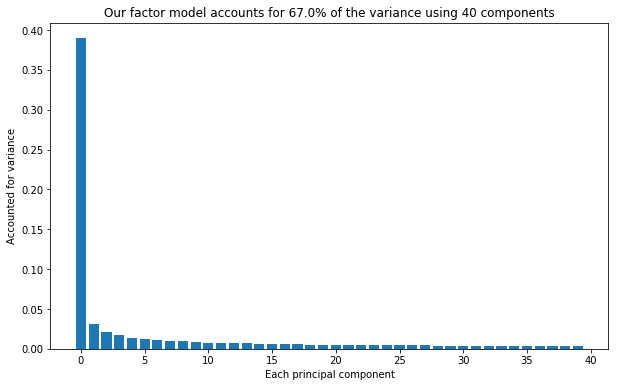

In [117]:
%matplotlib inline

import matplotlib.pyplot as plt

explained_variance = round(sum(pca.explained_variance_ratio_)*100,0)

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Make the bar plot
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_)
plt.title(f'Our factor model accounts for {explained_variance}% \
of the variance using {num_factor_exposures} components' )
plt.xlabel('Each principal component')
plt.ylabel('Accounted for variance')
plt.show()

You can see that the first factor dominates. The precise defintion of each factor in a latent model is unknown, however we can guess at the likely intepretation.

# View The Factor Returns

Remember that the factors returns don't necessarily have direct interpretations in the real world but you can thinik of them as returns time series for some kind of latent or unknown driver of return variance. 

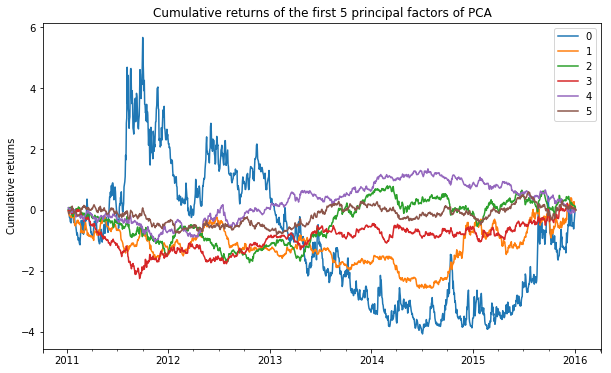

In [124]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]


rm.factor_returns.loc[:,0:5].cumsum().plot();
plt.ylabel('Cumulative returns')
plt.title('Cumulative returns of the first 5 principal factors of PCA')
plt.show()